# 🌾 Grain Variety Classification Challenge

**Starting Kit - Quick Start Guide**

> 📖 **For detailed explanations**, see the main [README.md](../README.md)

---

## 📋 Quick Overview

**Goal**: Classify wheat grain varieties from images (8 classes)

**Task**: Multi-class classification using deep learning

**Challenge Focus**: Model generalization across different conditions

**Baseline**: Random Forest Classifier (scikit-learn) - Fast and simple baseline

---

## 📚 Notebook Structure

This notebook is organized into 5 sections:

1. **Imports & Setup** - Load libraries and configure environment
2. **Data Loading** - Load and explore grain images
3. **Visualization** - Visualize data and class distributions
4. **Training** - Train baseline model
5. **Evaluation** - Evaluate model with metrics and error bars
6. **Submission** - Prepare submission for Codabench

> 💡 **Tip**: Run cells in order. See [README.md](../README.md) for detailed explanations.

---

## 🔧 Setup

You can run this notebook in two ways:

1. **Google Colab** (Recommended for beginners)

2. **Local Environment**
   - Requires Python 3.7+
   - Install required packages (see next section)
   - Clone the repository and navigate to `Starting_Kit/` folder

### Required Packages

The following packages are needed to run this notebook. Install them using the cell below or via pip/conda.

**Core packages**:
- `numpy`: Numerical computing
- `pandas`: Data manipulation
- `matplotlib`: Visualization
- `scikit-learn`: Machine learning utilities (Random Forest baseline)

**Optional (for deep learning)**:
- `tensorflow` or `keras`: Deep learning framework (if you want to try CNN models)

---

### Environment Detection

Automatically detects Colab vs local environment.

**Install packages** if needed (especially on Colab):

In [ ]:
# Install required packages (uncomment if needed)
# !pip install numpy pandas matplotlib scikit-learn

# Check if running on Colab
COLAB = 'google.colab' in str(get_ipython())
print(f"Running on {'Google Colab' if COLAB else 'Local environment'}")

Running on Local environment


In [13]:
if COLAB:
    # Clone GitHub repository
    !git clone --depth 1 https://github.com/md-naim-hassan-saykat/grain-1-generalization-ai-challenge.git
    # Move to the starting kit folder
    %cd grain-1-generalization-ai-challenge/Starting_Kit/
    print("✓ Repository cloned and moved to Starting_Kit folder")

# 0 - Imports & Settings

Import required libraries. See [README.md](../README.md#getting-started) for package installation details.

In [1]:
import os
import re
import zipfile
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# 1 - Data Loading

Load and explore grain images. Each `.npz` file contains:
- `x`: Grain image (NumPy array)
- `y`: Variety label (integer, 8 classes)

**Dataset options**:
- **RGB** (recommended): 3-channel images, faster, simpler
- **Spectral**: Multi-channel images, more information

> 📖 See [README.md](../README.md#data-description) for detailed data structure and metadata information.

**Tip**: Use `max_samples` parameter for quick testing (e.g., `max_samples=1000`). Always test with full data before submission!

In [2]:
# Import the Data class and utility functions from functions.py
# All implementation details are in functions.py for better readability
from functions import Data, plot_class_distribution, plot_metadata_analysis

Loaded 26882 files from ../Data/Grain-Data-RGB
Extracted metadata for 26882 files

Metadata preview:
  grainID varietyNumber microplotID  year month day timestamp  \
0   23632             7      x72y15  2021    10  23    144229   
1    7795             6      x40y20  2020    12  02    134036   
2    7511             5      x39y20  2020    12  02    131556   
3   16801             2      x76y12  2021    10  19    160332   
4    7613             5      x39y20  2020    12  02    132032   

                                            filename  
0  grain23632_var7-x72y15_7000_us_2x_2021-10-23T1...  
1  grain7795_x40y20-var6_8000_us_2x_2020-12-02T13...  
2  grain7511_x39y20-var5_8000_us_2x_2020-12-02T13...  
3  grain16801_var2-x76y12_7000_us_2x_2021-10-19T1...  
4  grain7613_x39y20-var5_8000_us_2x_2020-12-02T13...  

Metadata statistics:
Number of unique grains: 26882
Number of unique varieties: 8
Number of unique microplots: 32

Total number of files: 26882
Date range: 2020-2021

Sample fil

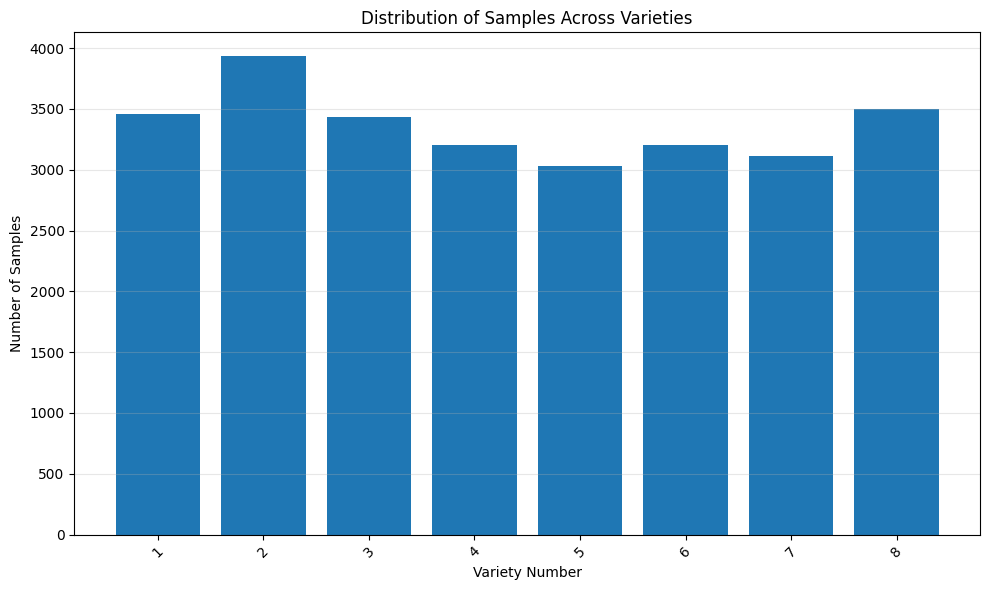


Sample counts per variety:
  Variety 1: 3462 samples
  Variety 2: 3933 samples
  Variety 3: 3434 samples
  Variety 4: 3205 samples
  Variety 5: 3031 samples
  Variety 6: 3201 samples
  Variety 7: 3115 samples
  Variety 8: 3501 samples


In [3]:
# Example usage
# Choose dataset type: "RGB" or "Spectral"
# For testing, you can use a smaller dataset by limiting files
# For production, remove the file limit to use all data

data = Data(data_dir="../Data", dataset_type="RGB")

# Load all files and extract metadata
files, metadata = data.load_data()

# Display metadata
print("\nMetadata preview:")
print(metadata.head())

# Display metadata statistics
print("\nMetadata statistics:")
print(f"Number of unique grains: {metadata['grainID'].nunique()}")
print(f"Number of unique varieties: {metadata['varietyNumber'].nunique()}")
print(f"Number of unique microplots: {metadata['microplotID'].nunique()}")

# Additional statistics
print(f"\nTotal number of files: {len(files)}")
print(f"Date range: {metadata['year'].min()}-{metadata['year'].max()}")

# Load a single file example
if len(files) > 0:
    sample_file = files[0]
    sample_data = data.load_single_file(sample_file)
    print(f"\nSample file: {sample_file}")
    print(f"Image shape (x): {sample_data['x'].shape}")
    print(f"Label (y): {sample_data['y']}")
    print(f"Available keys: {list(sample_data.keys())}")
    
    # Visualize class distribution
    print("\n" + "="*60)
    print("Class Distribution Analysis")
    print("="*60)
    plot_class_distribution(metadata)

# 2 - Visualization

Visualize grain images to understand your data before training.

**Available visualizations**:
- Random samples grid
- Samples by variety
- Single image detail
- Class distribution
- Metadata analysis

> 📖 See [README.md](../README.md#data-description) for more details on data structure and analysis.

In [17]:
# Utility functions already imported in section 1
# (plot_class_distribution, plot_metadata_analysis)

In [4]:
# Import the Visualize class from functions.py
from functions import Visualize

Plotting random samples...


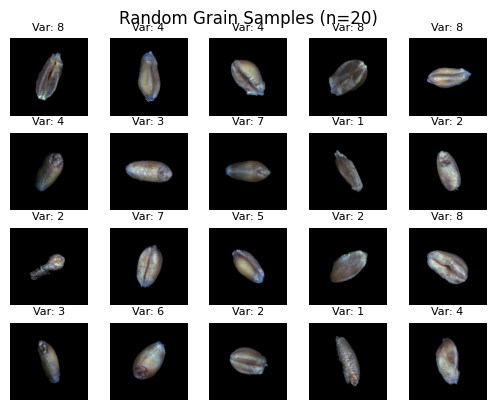


Plotting samples from variety 7...


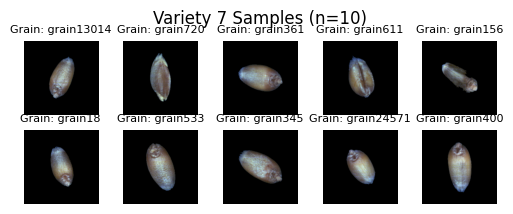


Plotting a single image...


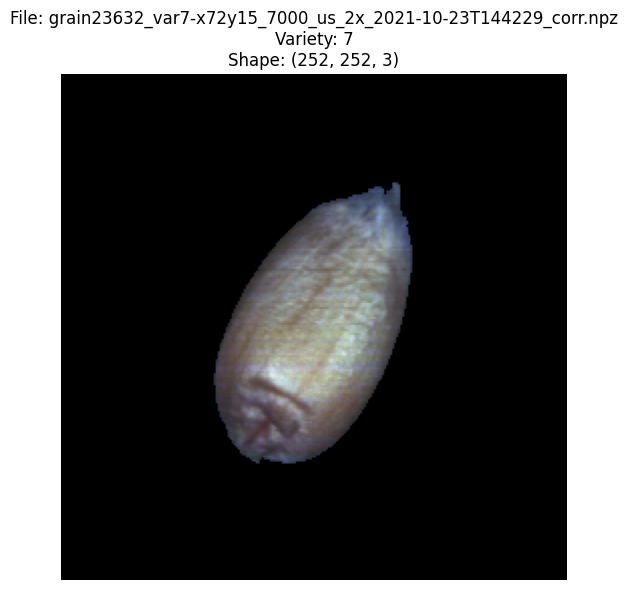

In [5]:
# Example usage
visualize = Visualize(data=data)

# Plot random samples (default)
print("Plotting random samples...")
visualize.plot_random_samples(n_samples=20, cols=5)

# Plot samples from a specific variety
print("\nPlotting samples from variety 7...")
visualize.plot_by_variety(variety_number=7, n_samples=10, cols=5)

# Plot a single image
print("\nPlotting a single image...")
visualize.plot_single_image(index=0)

# 3 - Training

Train a baseline model using Random Forest Classifier (scikit-learn).

**Baseline architecture**:
- Random Forest Classifier (ensemble of decision trees)
- Images resized to (64, 64) and flattened
- StandardScaler for feature normalization
- Fast training on CPU (no GPU required)

> ⚠️ **This is a BASELINE - improve it!** See [README.md](../README.md#model-architecture) for detailed architecture and improvement suggestions. 

In [6]:
# Import the Train class from functions.py
from functions import Train

In [7]:
# Example usage
# Initialize training with data
# Note: Using max_samples=5000 for faster training in this example
# Remove max_samples to use all data
train = Train(data=data, test_size=0.2, random_state=42, img_size=(64, 64))

# Prepare data (this may take a few minutes for large datasets)
train.prepare_data(max_samples=5000)  # Remove max_samples to use all data

# Build the baseline model (Random Forest)
train.build_model(n_estimators=50, max_depth=10)  # Adjust hyperparameters as needed

# Train the model (Random Forest doesn't use epochs/batch_size)
train.train()

# Evaluate on test set
results = train.evaluate()

# Plot training history (simplified for Random Forest)
train.plot_training_history()

# Save the model (optional)
# train.save_model("baseline_model.joblib")

Loading 5000 samples...
Loaded 1000/5000 samples...
Loaded 2000/5000 samples...
Loaded 3000/5000 samples...
Loaded 4000/5000 samples...
Loaded 5000/5000 samples...

Data prepared:
  Training samples: 4000
  Test samples: 1000
  Number of classes: 8
  Feature vector shape: (12288,)
  Classes: ['1' '2' '3' '4' '5' '6' '7' '8']

Model: Random Forest Classifier
  Number of estimators (trees): 50
  Max depth: 10
  Number of features: 12288

Training Random Forest model...
  Training samples: 4000
  Number of features: 12288
  Number of classes: 8
  Scaling features...
  Training Random Forest (this may take a few minutes)...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s



Training completed!

Evaluating on test set...
Test Accuracy: 0.3010

Classification Report:
              precision    recall  f1-score   support

   Variety 1       0.33      0.24      0.28       124
   Variety 2       0.41      0.45      0.43       143
   Variety 3       0.35      0.20      0.25       127
   Variety 4       0.45      0.30      0.36       115
   Variety 5       0.22      0.14      0.17       121
   Variety 6       0.22      0.29      0.25       124
   Variety 7       0.20      0.28      0.23       111
   Variety 8       0.30      0.47      0.37       135

    accuracy                           0.30      1000
   macro avg       0.31      0.30      0.29      1000
weighted avg       0.31      0.30      0.30      1000

Note: Random Forest doesn't have epoch-based training history.
Training completed successfully!
  Training samples: 4000
  Number of features: 12288


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


# 4 - Evaluation

Evaluate model performance with multiple metrics and visualizations.

**Available metrics**:
- Accuracy (primary metric for leaderboard)
- F1-Score (Macro)
- Cohen's Kappa
- Confusion matrix
- Per-class accuracy
- Top-k accuracy

> 📖 See [README.md](../README.md#evaluation-metrics) for detailed metric explanations. 

In [8]:
# Import the Score class from functions.py
from functions import Score

Generating predictions...
Predictions generated!
CLASSIFICATION SCORES

Overall Accuracy: 0.3010 (30.10%)

Macro Average:
  Precision: 0.3110
  Recall: 0.2959
  F1-score: 0.2932

Weighted Average:
  Precision: 0.3133
  Recall: 0.3010
  F1-score: 0.2970

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

   Variety 1       0.33      0.24      0.28       124
   Variety 2       0.41      0.45      0.43       143
   Variety 3       0.35      0.20      0.25       127
   Variety 4       0.45      0.30      0.36       115
   Variety 5       0.22      0.14      0.17       121
   Variety 6       0.22      0.29      0.25       124
   Variety 7       0.20      0.28      0.23       111
   Variety 8       0.30      0.47      0.37       135

    accuracy                           0.30      1000
   macro avg       0.31      0.30      0.29      1000
weighted avg       0.31      0.30      0.30      1000



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


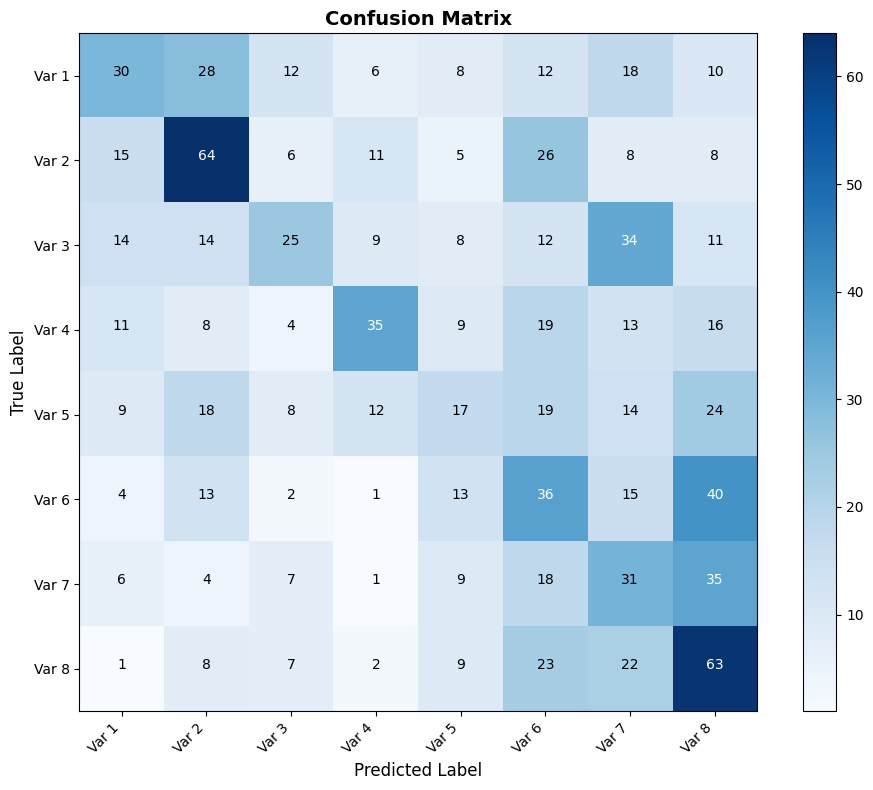

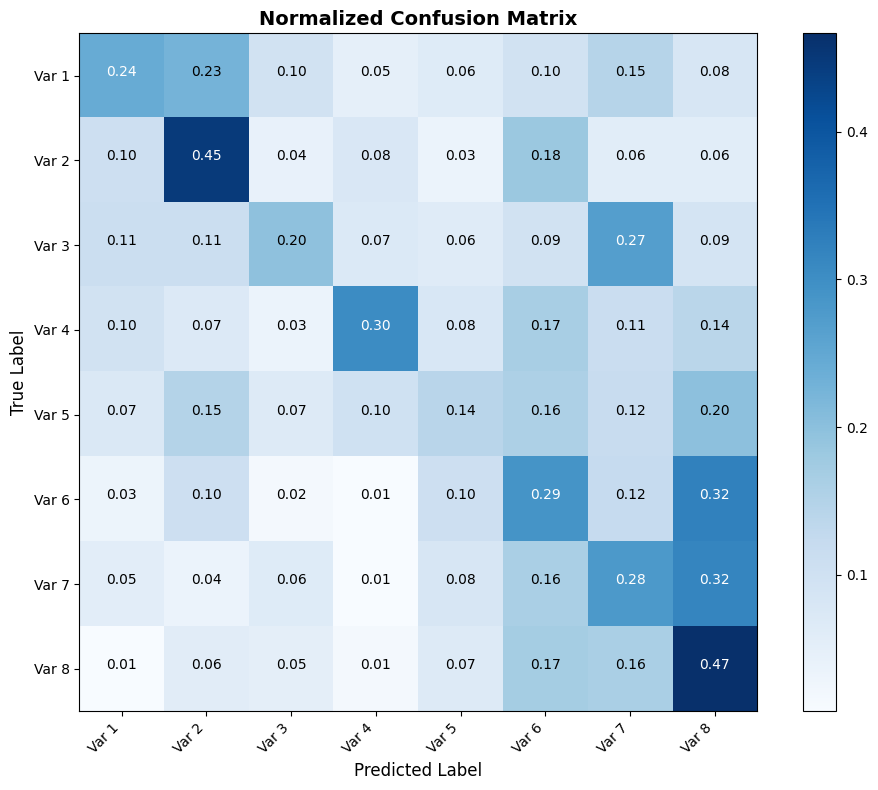


PER-CLASS ACCURACY
Class                Accuracy        Samples        
------------------------------------------------------------
Variety 1             24.19%              124
Variety 2             44.76%              143
Variety 3             19.69%              127
Variety 4             30.43%              115
Variety 5             14.05%              121
Variety 6             29.03%              124
Variety 7             27.93%              111
Variety 8             46.67%              135

Top-3 Accuracy: 0.6760 (67.60%)


np.float64(0.676)

In [9]:
# Example usage
# Option 1: Use with Train object (recommended)
score = Score(train_obj=train)
scores = score.compute_score()

# Print detailed classification report
score.print_classification_report()

# Plot confusion matrix
score.plot_confusion_matrix(normalize=False)

# Plot normalized confusion matrix
score.plot_confusion_matrix(normalize=True)

# Print per-class accuracy
score.print_per_class_accuracy()

# Compute top-3 accuracy
score.get_top_k_accuracy(k=3)

# Option 2: Use with separate model and data
# score = Score(model=train.model, X_test=train.X_test, 
#               y_test=train.y_test, label_encoder=train.label_encoder)
# score.compute_score()

### 📊 Advanced Evaluation: Metrics with Error Bars

Compute **3 key metrics** with confidence intervals using bootstrap:
- Accuracy (primary)
- F1-Score (Macro)
- Cohen's Kappa

> 📖 See [README.md](../README.md#evaluation-metrics) for detailed metric explanations and why error bars matter.

Computing all available metrics...

ALL METRICS SUMMARY
accuracy                 : 0.3010
f1_macro                 : 0.2932
cohen_kappa              : 0.1997

PLOTTING METRICS WITH ERROR BARS
This may take a few minutes (computing 100 bootstrap samples)...
Computing metrics with 100 bootstrap samples...
  Completed 20/100 bootstrap samples...
  Completed 40/100 bootstrap samples...
  Completed 60/100 bootstrap samples...
  Completed 80/100 bootstrap samples...
  Completed 100/100 bootstrap samples...
✓ Bootstrap computation completed!


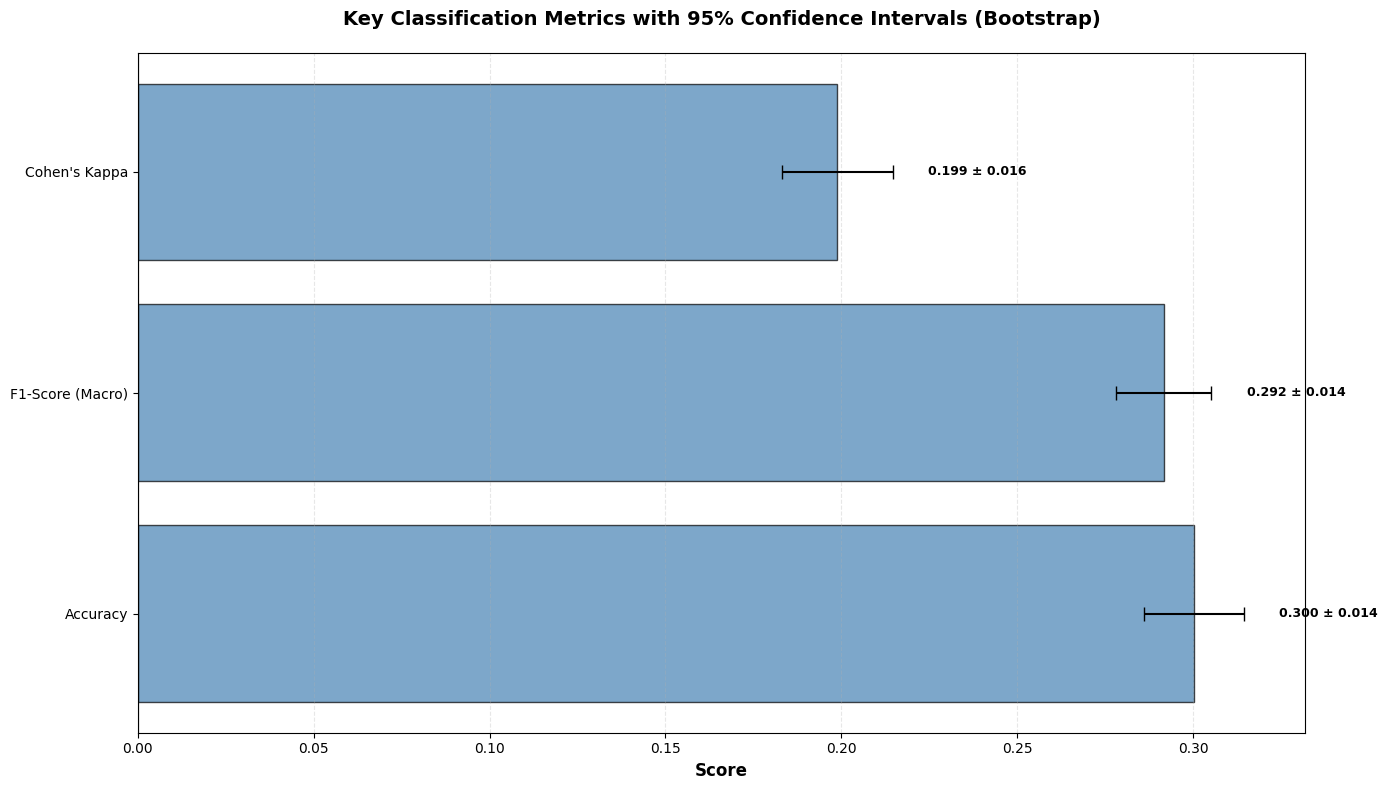


KEY METRICS SUMMARY (with Bootstrap Confidence Intervals)
Metric                    Mean         Std          95% CI               Description
--------------------------------------------------------------------------------
Accuracy                  0.3004       0.0142       [0.2726, 0.3281] Overall classification accuracy
F1-Score (Macro)          0.2916       0.0136       [0.2649, 0.3183] Balanced metric for multi-class (treats all classes equally)
Cohen's Kappa             0.1988       0.0158       [0.1680, 0.2297] Agreement beyond chance (accounts for class imbalance)


In [10]:
# Advanced evaluation: Compute all metrics
print("Computing all available metrics...")
all_metrics = score.compute_all_metrics()

print("\n" + "=" * 60)
print("ALL METRICS SUMMARY")
print("=" * 60)
for metric_name, value in all_metrics.items():
    print(f"{metric_name:<25}: {value:.4f}")
print("=" * 60)

# Plot metrics with error bars (using bootstrap)
# This will compute metrics multiple times with bootstrap sampling
# to get confidence intervals (error bars)
print("\n" + "=" * 60)
print("PLOTTING METRICS WITH ERROR BARS")
print("=" * 60)
print("This may take a few minutes (computing 100 bootstrap samples)...")
bootstrap_results = score.plot_metrics_with_error_bars(n_bootstrap=100, random_state=42)

---

## 👥 Credits & Contact

**Group 1 - Grain (Generalization)**  
AI Challenge Course · Université Paris-Saclay · 2025-26

> 📖 See [README.md](../README.md#team--contact) for detailed contact information and resources.